In [1]:
using Distributions
using StatsPlots

function plot_tstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim = (-5, 5),
        xtick = -5:5,
        bin = range(extrema(xtick)...; length=51),
    )
    tstat(sample) = (mean(sample) - mean(dist))/√(var(sample)/n)
    T = [tstat(rand(dist, n)) for _ in 1:L]
    histogram(T; norm=true, alpha=0.3, label="(x - μ)/√(u²/n)", xlim, xtick, bin)
    plot!(TDist(n-1); lw=1.5, label="Tdist(n - 1)")
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n"; titlefontsize=10)
end

function plot_chisqstat(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
    )
    X = (n-1)*[var(rand(dist, n)) for _ in 1:L]/var(dist)
    m, s = mean(X), std(X)
    M, S = n - 1, (n - 1)*√((kurtosis(dist) + 3)/n - (n - 3)/(n*(n - 1)))
    xlim = (max(-1, m - 4s), n + 4s)
    bin = range(0, maximum(xlim); length=101)
    histogram(X; norm=true, alpha=0.3, label="(n - 1)u²/σ²", xlim, bin)
    plot!(Chisq(n-1); lw=1.5, label="Chisq(n - 1)")
    S == Inf || plot!(Normal(M, S); lw=1.5, ls=:dash, label="normal dist.")
    diststr = replace("$dist", r"\{.*\}"=>"")
    title!("$diststr,  n = $n"; titlefontsize=10)
end

function plot_both(;
        n = 10,
        L = 10^5,
        dist = Normal(1, 2),
        xlim1 = (-5, 5),
        xtick1 = -5:5,
        bin1 = range(extrema(xtick1)...; length=51),
    )
    P = plot_tstat(; n, L, dist, xlim=xlim1, xtick=xtick1, bin=bin1)
    Q = plot_chisqstat(; n, L, dist)
    plot(P, Q; size=(800, 300))
end

plot_both (generic function with 1 method)

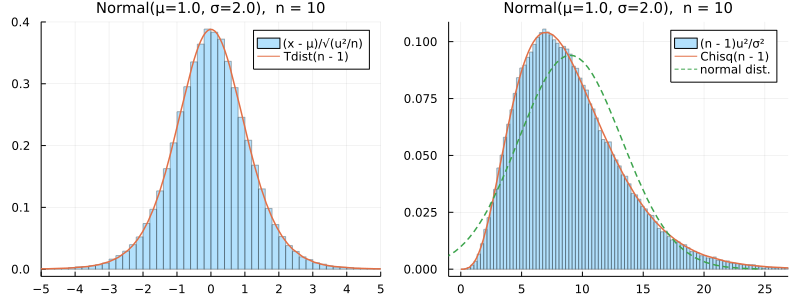

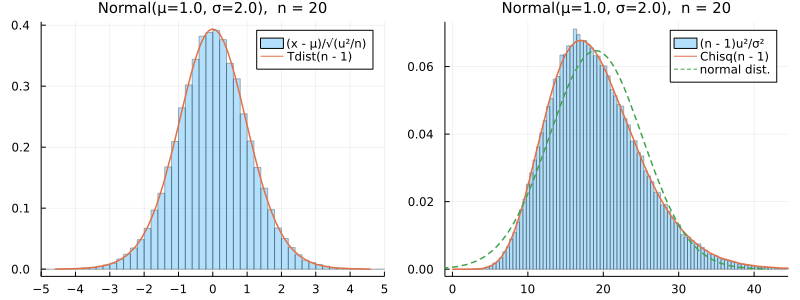

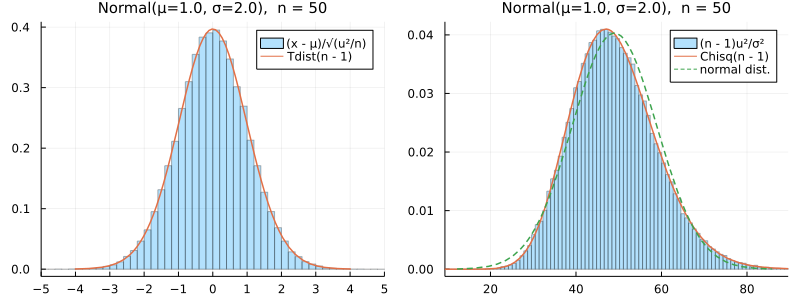

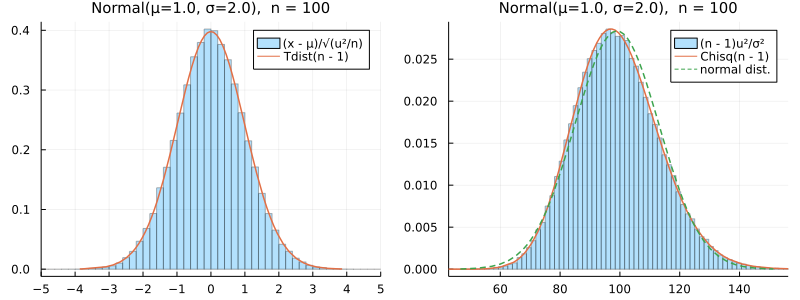

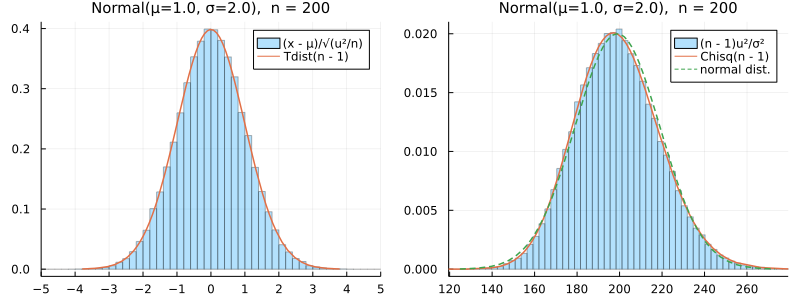

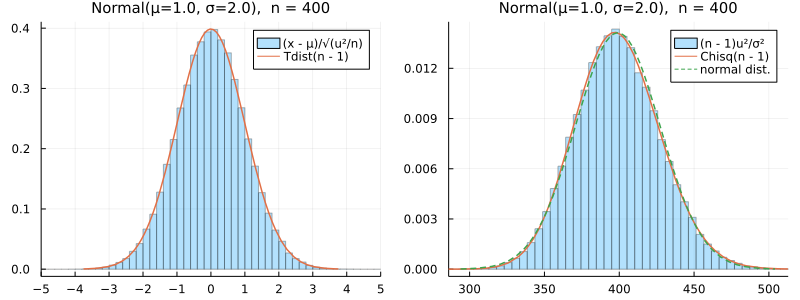

In [2]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; n) |> display
end

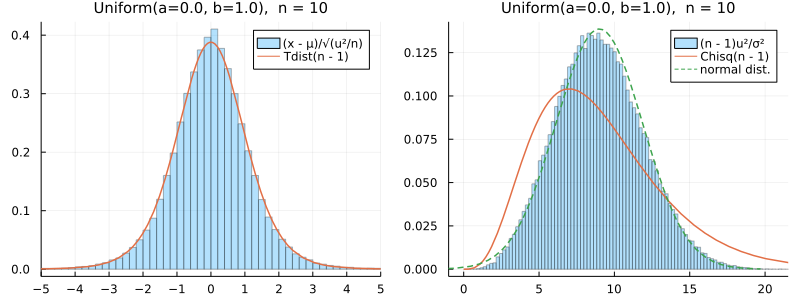

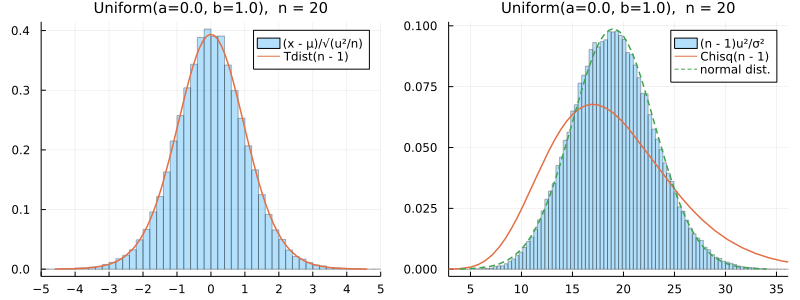

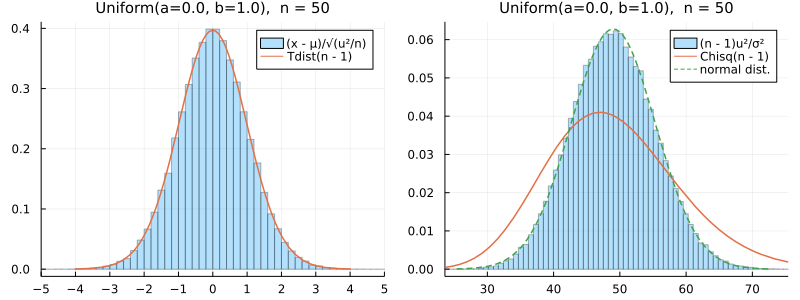

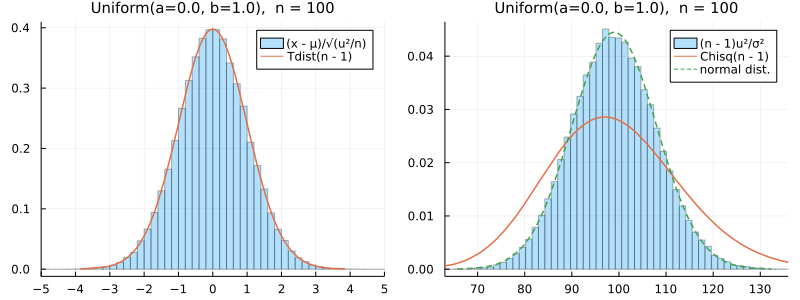

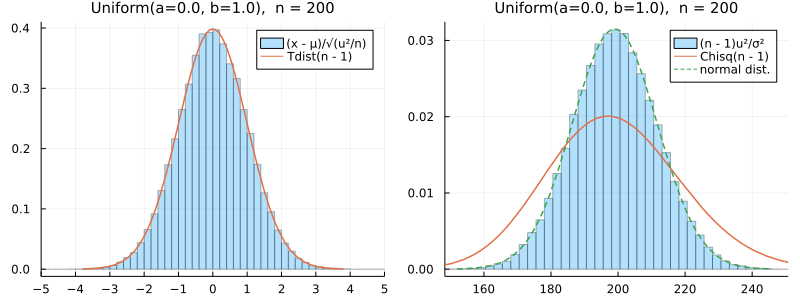

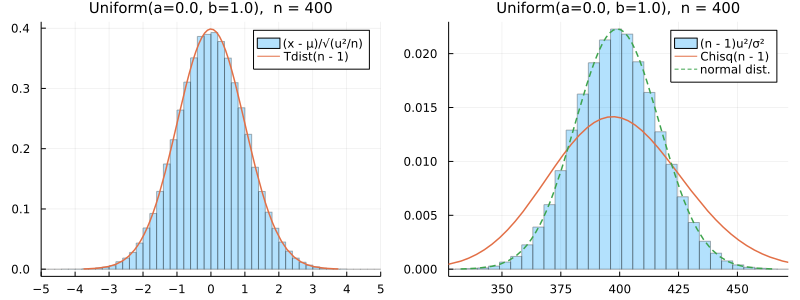

In [3]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Uniform(0, 1), n) |> display
end

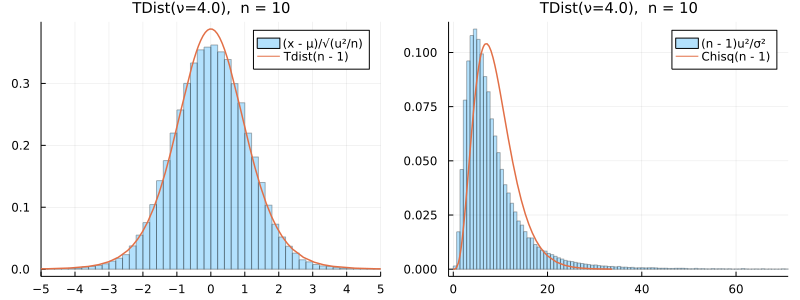

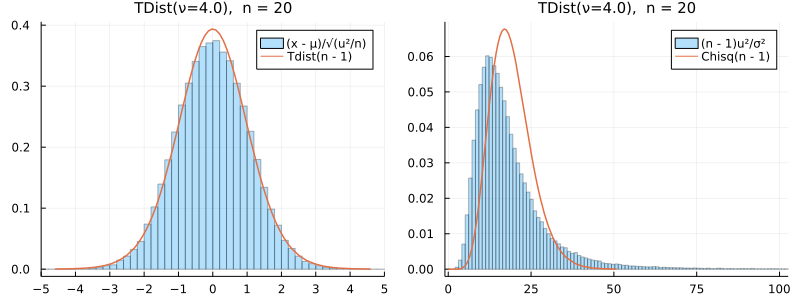

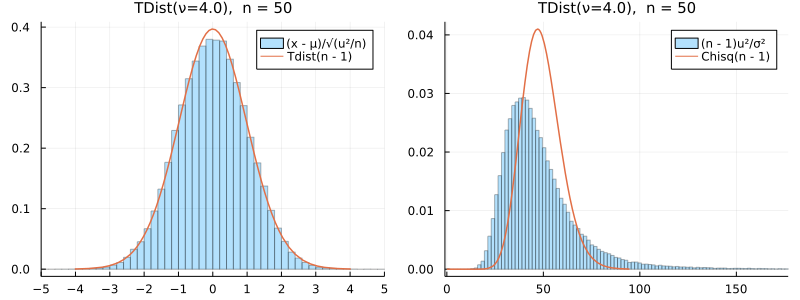

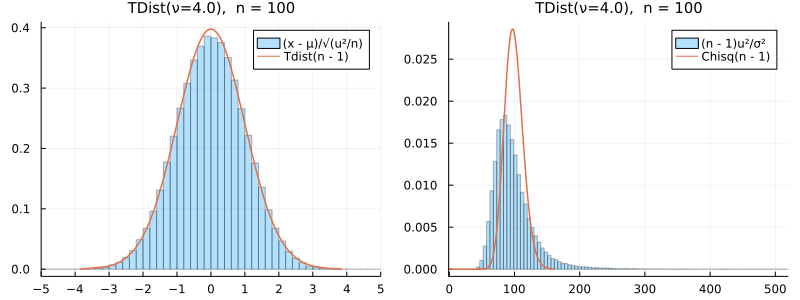

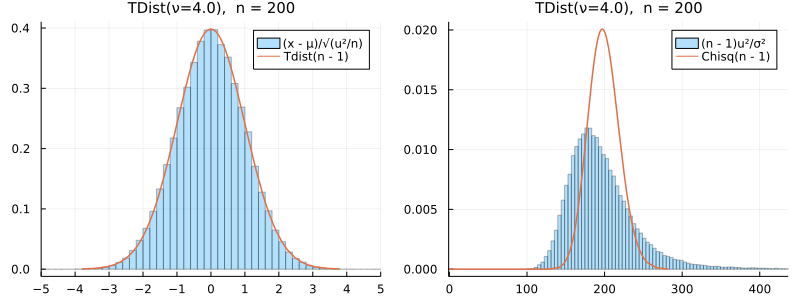

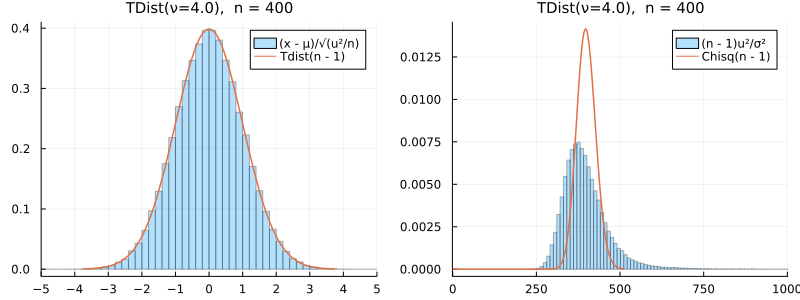

In [4]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = TDist(4), n) |> display
end

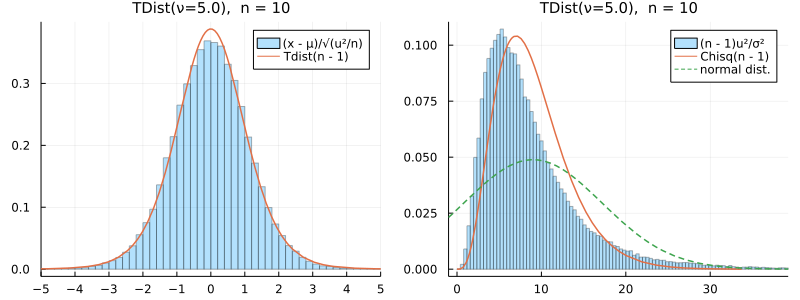

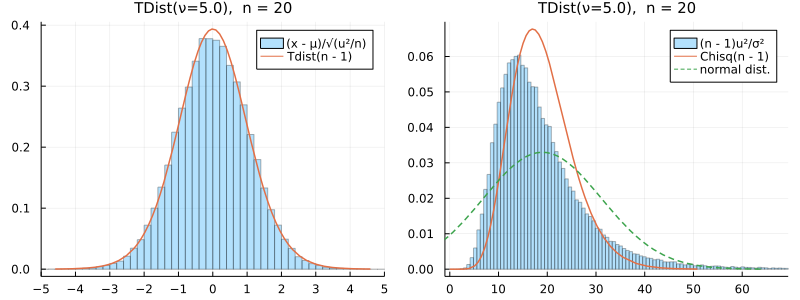

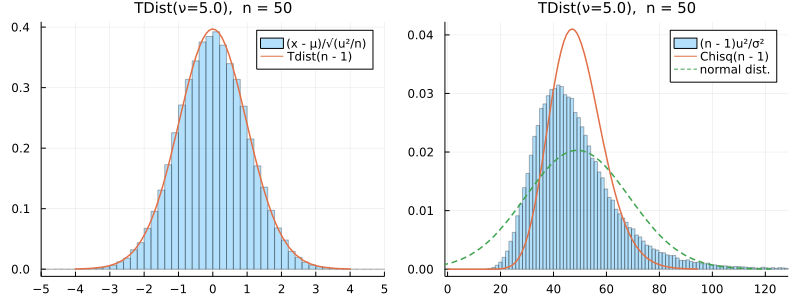

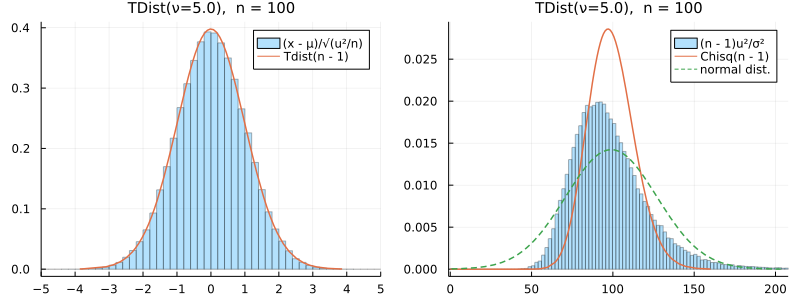

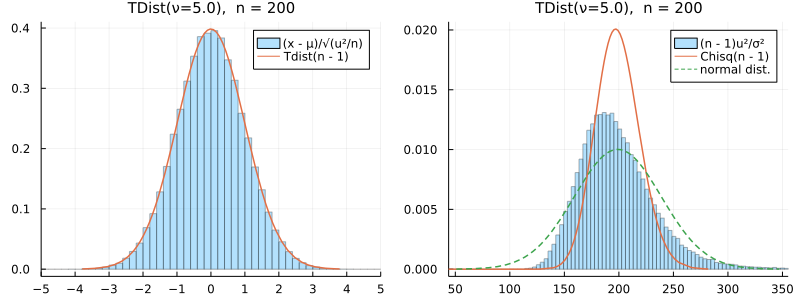

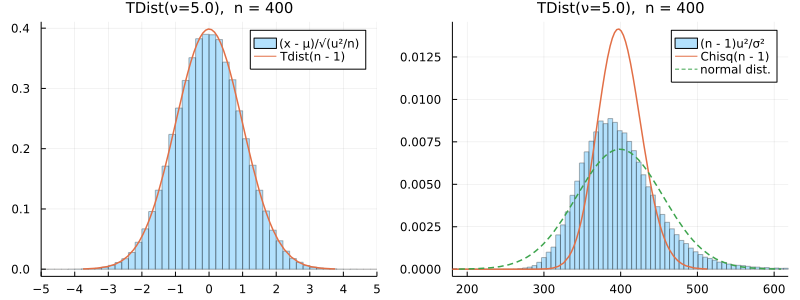

In [5]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = TDist(5), n) |> display
end

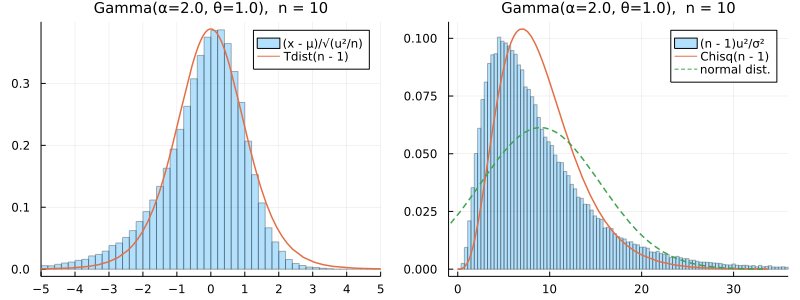

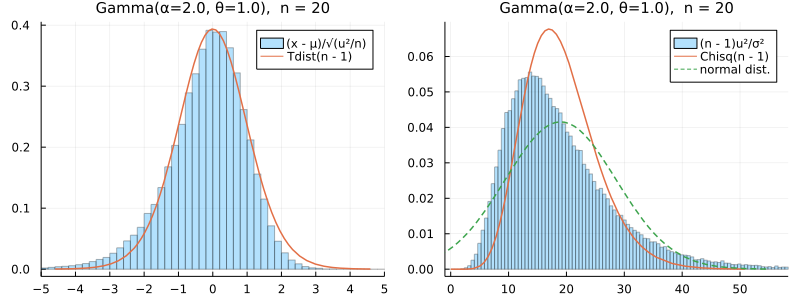

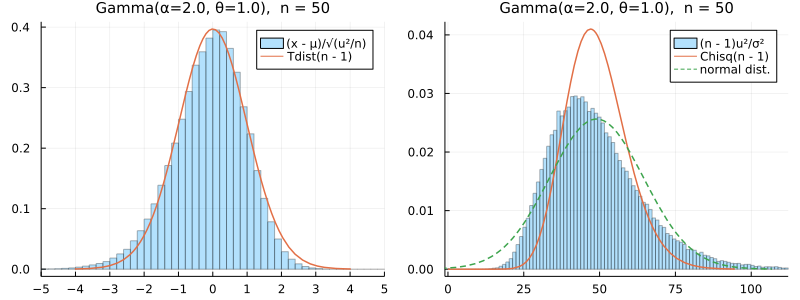

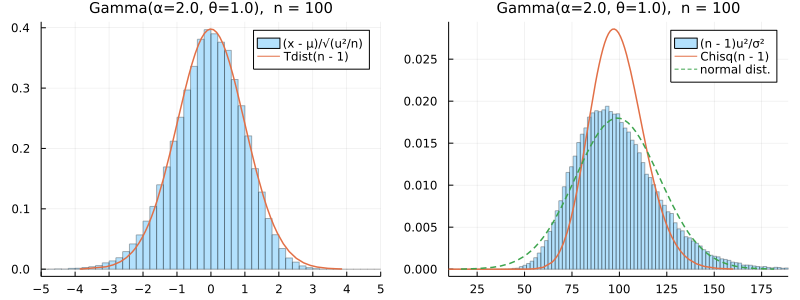

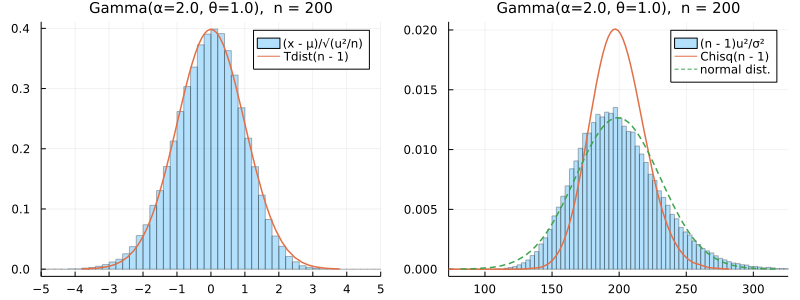

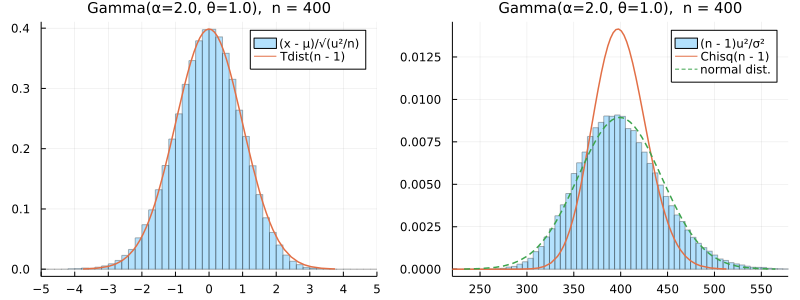

In [6]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(2, 1), n) |> display
end

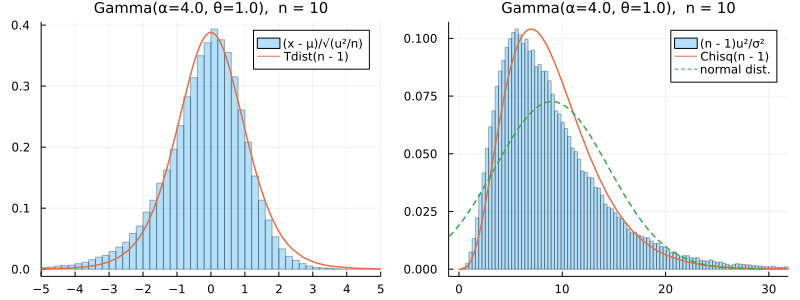

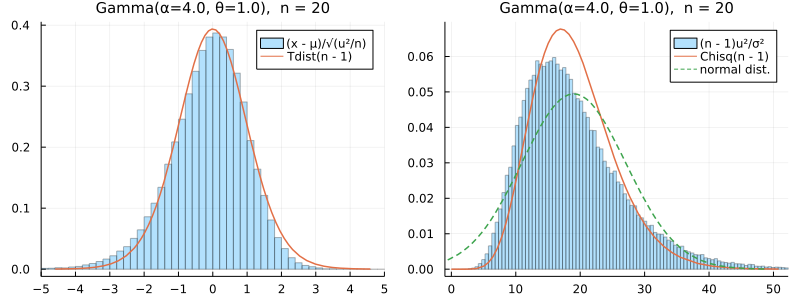

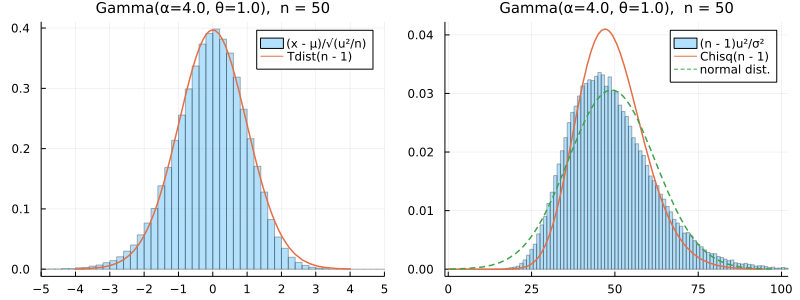

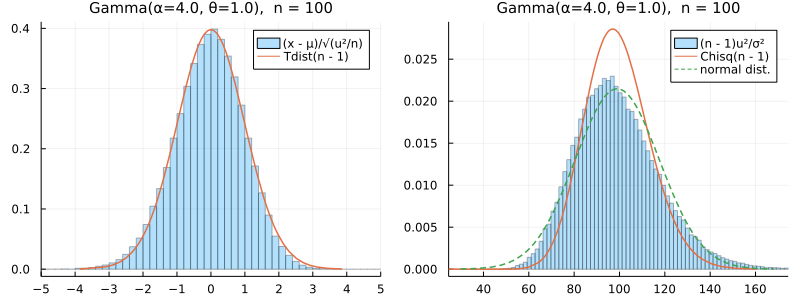

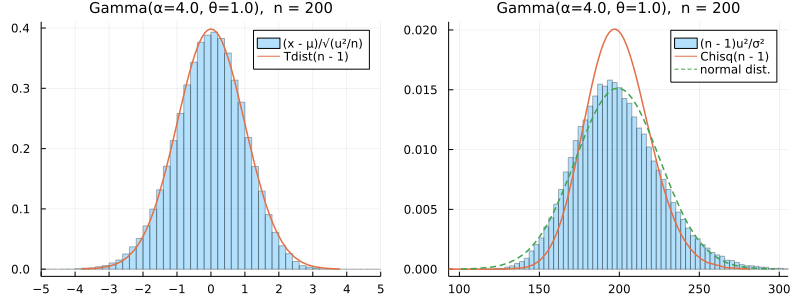

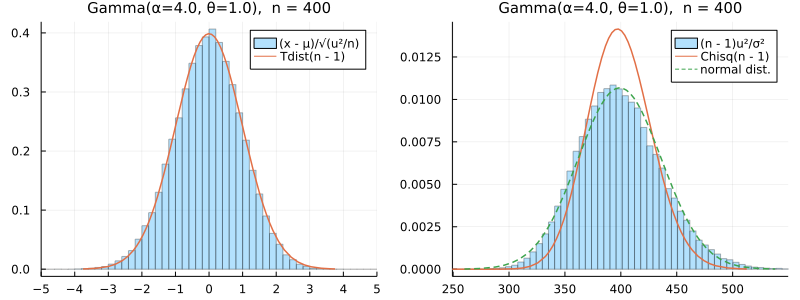

In [7]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(4, 1), n) |> display
end

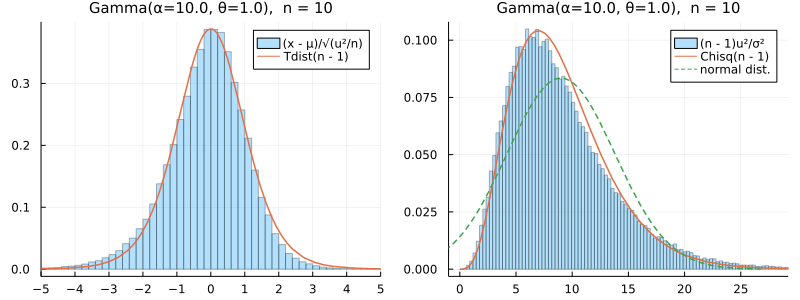

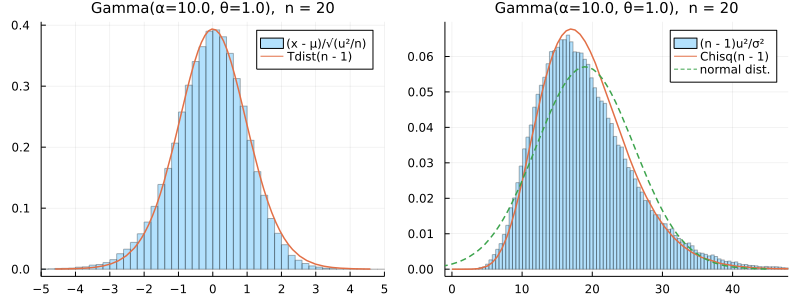

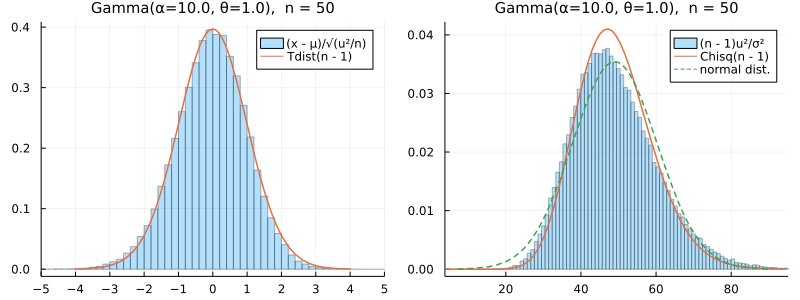

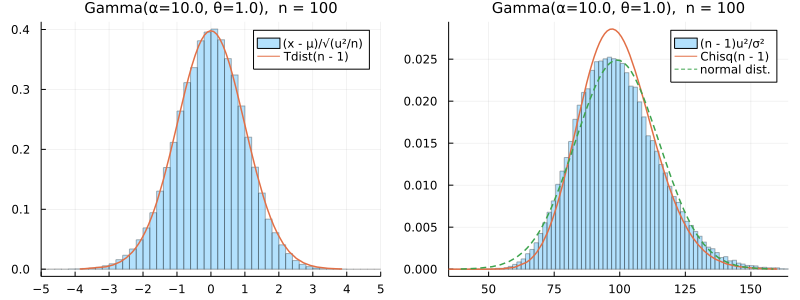

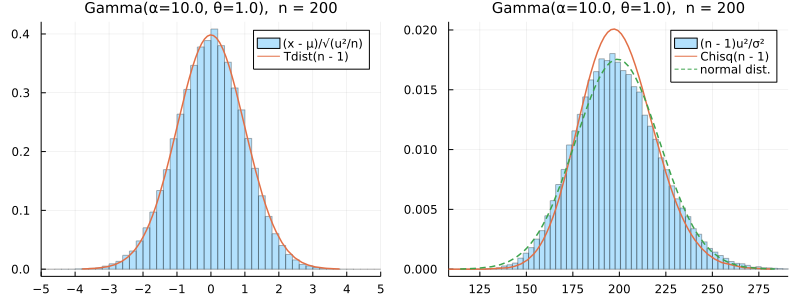

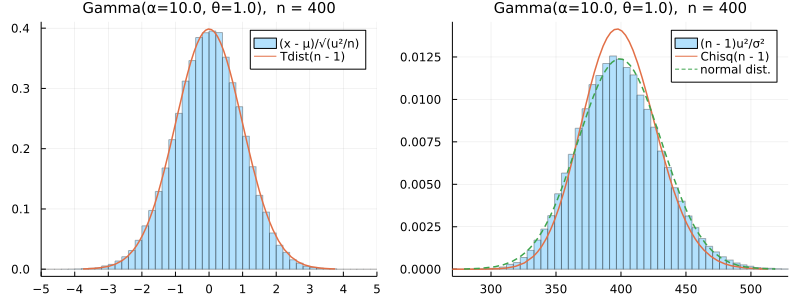

In [8]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Gamma(10, 1), n) |> display
end

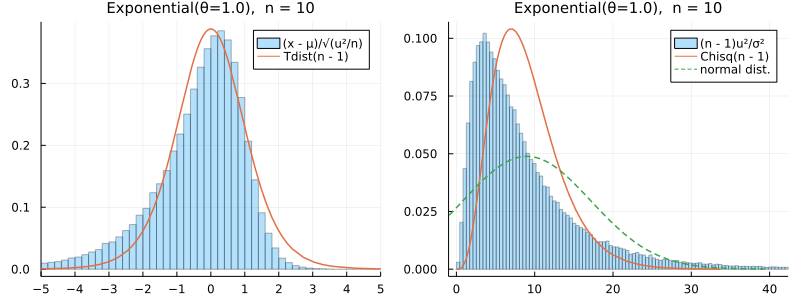

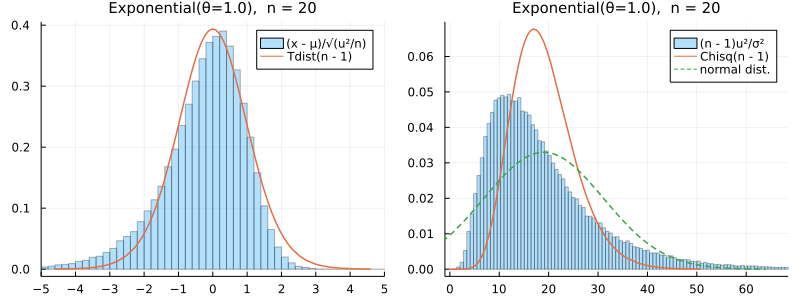

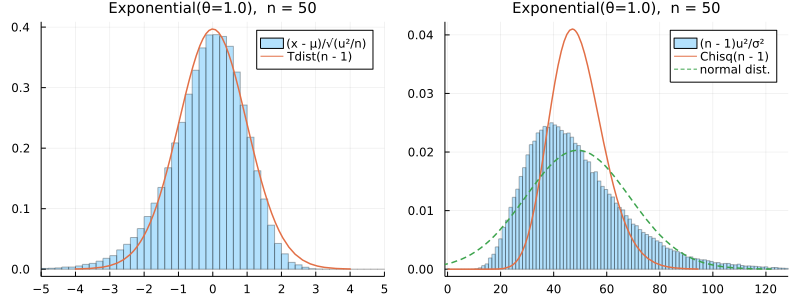

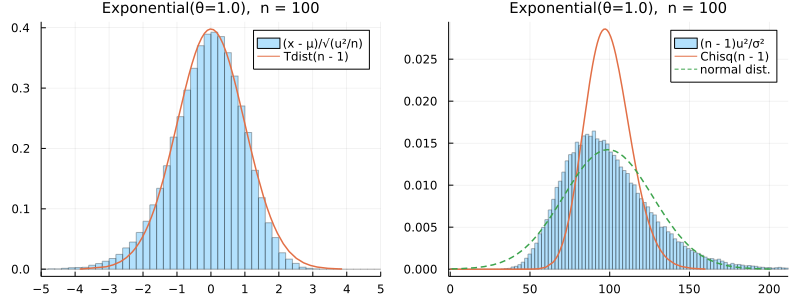

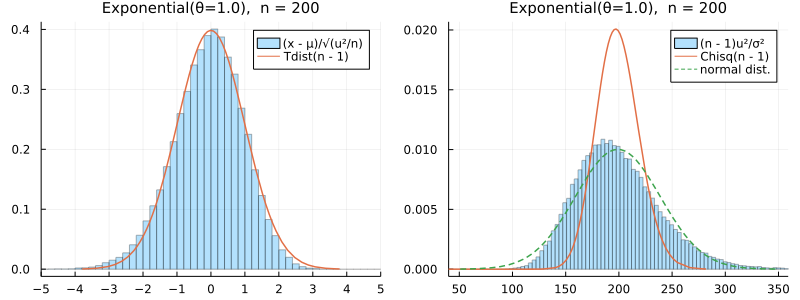

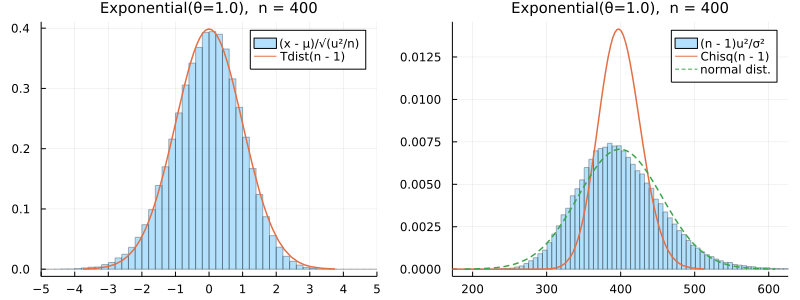

In [9]:
for n in (10, 20, 50, 100, 200, 400)
    plot_both(; dist = Exponential(), n) |> display
end